<a href="https://colab.research.google.com/github/htapiagroup/sistemas-distribuidos-evaluacion-intersemestral-lomik33/blob/master/SistDist_Examen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Equipo:
Ismael López Martínez <br/>
Ginna Monzerrat Nava Enríquez<br/>
Francisco García Ortega<br/>
José David Cobos Trujillo<br/>
Examen: https://colab.research.google.com/drive/13lToRPMX3G1jm6Owj195lWWQQ5OLEhiB

In [0]:
!wget https://archive.org/download/nycTaxiTripData2013/trip_data.7z #descarga del dataset

--2019-06-24 21:41:05--  https://archive.org/download/nycTaxiTripData2013/trip_data.7z
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia902501.us.archive.org/1/items/nycTaxiTripData2013/trip_data.7z [following]
--2019-06-24 21:41:05--  https://ia902501.us.archive.org/1/items/nycTaxiTripData2013/trip_data.7z
Resolving ia902501.us.archive.org (ia902501.us.archive.org)... 207.241.228.211
Connecting to ia902501.us.archive.org (ia902501.us.archive.org)|207.241.228.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4102781969 (3.8G) [application/x-7z-compressed]
Saving to: ‘trip_data.7z’

trip_data.7z        100%[===================>]   3.82G  9.50MB/s    in 8m 46s  

2019-06-24 21:49:51 (7.44 MB/s) - ‘trip_data.7z’ saved [4102781969/4102781969]



In [0]:
!7z l trip_data.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 4102781969 bytes (3913 MiB)

Listing archive: trip_data.7z

--
Path = trip_data.7z
Type = 7z
Physical Size = 4102781969
Headers Size = 433
Method = LZMA:24
Solid = -
Blocks = 12

   Date      Time    Attr         Size   Compressed  Name
------------------- ----- ------------ ------------  ------------------------
2014-05-12 22:02:53 ....A   2459600863    345687208  trip_data_1.csv
2014-01-15 06:55:32 ....A   2502278613    358624764  trip_data_10.csv
2014-01-15 07:34:24 ....A   2395449056    342987617  trip_data_11.csv
2014-01-15 08:09:28 ....A   2327237611    331056148  trip_data_12.csv
2014-05-12 22:08:09 ....A   2328673265    327374725  trip_data_2.csv
2013-08-26 02:19:46 ....A   2622301287    371026139  trip_data

In [0]:
import pandas as pd
import numpy as np
import psutil, os 
import dask.dataframe as dd
import gc
import time
import datetime as dt
import matplotlib.pyplot as plt

In [0]:
#Plantilla para descomprimir los archivos del archivo 7z
plantilla = 'trip_data_{:01d}.csv'

In [0]:
#Arreglo contiene el nombre de los archivos que eventualmente se descomprimiran del original
files =[ plantilla.format(month) for month in range(1,13)]

##1 y 2 Procesamiento de archivo trip_data.7z
Nuestro procedimiento consistio en descomprimir archivo por archivo, procesarlo, finalmente borrarlo.<br/>
Con el objetivo de no llenar el espacio en DD

In [0]:
def leer_archivo_depurado(fileName):  
  plantilla7z='7z x trip_data.7z  -o/content '+ fileName
  os.system(plantilla7z)
  data=dd.read_csv(file,low_memory=False, parse_dates=True, usecols=[0,5,6,7,8,9,10,11,12,13], 
                   names=['medallion','pickup_datetime','dropoff_datetime','passenger_count',
                          'trip_time_in_secs','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],header=0, dtype={'trip_distance': 'float64','trip_time_in_secs': 'int64', 'medallion': 'str', 'passenger_count': 'int64','pickup_longitude': 'float64','pickup_latitude':'float64','dropoff_longitude': 'float64', 'dropoff_latitude':'float64'}).compute() # se carga a dataset de pandas    
  os.system('rm '+fileName)  
  return data

In [0]:
def leer_archivo_puros(fileName):
  plantilla7z='7z x trip_data.7z  -o/content '+ fileName
  #print (plantilla7z)
  os.system(plantilla7z)
  data=dd.read_csv(file,low_memory=False, parse_dates=True, dtype={' store_and_fwd_flag':'object'}).compute() # se carga a dataset    
  os.system('rm '+fileName)  
  return data
  

##3.- Responder las siguientes preguntas:<br/>
A) Cuantas columnas contiene cada archivo de datos descomprimido.<br/>
B) Cuantos renglones tiene cada archivo.

In [0]:
dfContar = pd.DataFrame(columns=['Name', 'Columns', 'Rows'])


In [0]:
#Con base a la plantilla de los 12 archivos
#Se procesaron de forma secuencial uno tras otro con la librerias dask
#Para intercalar el uso de los recursos (Memoria, Disco Duro)
#Finalmente el resultado lo dejamos en un DataFrame de Pandas pues no implica gran uso de de los recursos
for file in files:
  df=leer_archivo_puros(file)
  total_rows=len(df.axes[0])
  total_cols=len(df.axes[1])
  new_row=pd.DataFrame({'Name' : file , 'Columns' : total_cols, 'Rows':total_rows},index=[0])  
  dfContar=pd.concat([new_row,dfContar]).reset_index(drop=True)

In [0]:
  dfContar.sort_values(by=['Name'])
  dfContar.head(12)

,Name,Columns,Rows
0,trip_data_12.csv,14,13971118
1,trip_data_11.csv,14,14388451
2,trip_data_10.csv,14,15004556
3,trip_data_9.csv,14,14107693
4,trip_data_8.csv,14,12597109
5,trip_data_7.csv,14,13823840
6,trip_data_6.csv,14,14385456
7,trip_data_5.csv,14,15285049
8,trip_data_4.csv,14,15100468
9,trip_data_3.csv,14,15749228


###4 Identificar si existen renglones con errores en los datos.<br/>
Por ejemplo si hay columnas de mas (o de menos), si hay campos vacios, etc. Si se detectan renglones con errores:<br/>
A)indicar claramente cuantos son los renglones con errores y a que archivos corresponden <br/>
B)crear un nuevo conjunto de datos con los errores eliminados <br/>

In [0]:
files =[plantilla.format(month) for month in range(1,13)]


In [0]:
dfLimpiar =  pd.DataFrame(columns=['Name', 'Columns', 'Rows','CantNulos','FueraRangoPasaje','FueraRangoNY','FueraMillas','RowsFinales'])

In [4]:
#Montamos la unidad de google para trabajar con ella y evitar que se llene el espacio de almacenamienta
from google.colab import drive
drive.mount('/content/gdrive' ,force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
quedafiltros=[]

In [0]:
def limpiarDataFrame(df):
    a=len(df.axes[0])
    df=df.dropna()
    #df = df[(df['passenger_count'] >0) & (df['passenger_count'] <= 7)]
    quedafiltros.append(a-len(df.axes[0]))
    a=len(df.axes[0])
    #df=df.dropna()
    df = df[(df['passenger_count'] >0) & (df['passenger_count'] <= 7)]
    quedafiltros.append(a-len(df.axes[0]))
    a=len(df.axes[0])
    df=df[(df['pickup_latitude'] >40.496136) & (df['pickup_latitude'] <40.897877) & (df['pickup_longitude'] >-74.269459)& (df['pickup_longitude'] <-73.690606)]
    quedafiltros.append(a-len(df.axes[0]))
    a=len(df.axes[0])
    df = df[(df['trip_distance'] <=100)]
    quedafiltros.append(a-len(df.axes[0]))
    return df

In [0]:
#Proceso de limpieza de datos se realiza sobre todos los datos del archivo original
for file in files:  
  df=leer_archivo_depurado(file)
  a=limpiarDataFrame(df)
  fname=file
  a.to_csv(fname)  
  gzipCommand="gzip "+fname  
  os.system(gzipCommand)  
  gzipName=fname+".gz"
  os.system( "mv "+gzipName +" \"/content/gdrive/My Drive/Colab Notebooks/"+gzipName+"\"") 
  total_rows=len(df.axes[0])
  total_cols=len(df.axes[1])
  new_row=pd.DataFrame({'Name' : file , 'Columns' : total_cols, 'Rows':total_rows,'CantNulos':quedafiltros[0],'FueraRangoPasaje':quedafiltros[1],'FueraRangoNY':quedafiltros[2],'FueraMillas':quedafiltros[3],'RowsFinales':total_rows-(quedafiltros[0]+quedafiltros[1]+quedafiltros[2]+quedafiltros[3])},index=[0])
  quedafiltros=[]
  dfLimpiar=pd.concat([new_row,dfLimpiar]).reset_index(drop=True)  

  



In [0]:
dfLimpiar

,Name,Columns,Rows,CantNulos,FueraRangoPasaje,FueraRangoNY,FueraMillas,RowsFinales
0,trip_data_12.csv,10,13971118,112,259,233359,0,13737388
1,trip_data_11.csv,10,14388451,754,136,276720,0,14110841
2,trip_data_10.csv,10,15004556,736,104,170721,0,14832995
3,trip_data_9.csv,10,14107693,78,94,152414,0,13955107
4,trip_data_8.csv,10,12597109,45,320,146214,771,12449759
5,trip_data_7.csv,10,13823840,698,109,206778,0,13616255
6,trip_data_6.csv,10,14385456,338,157,258610,0,14126351
7,trip_data_5.csv,10,15285049,39,86,798965,0,14485959
8,trip_data_4.csv,10,15100468,146,85,257812,0,14842425
9,trip_data_3.csv,10,15749228,293,136,282785,0,15466014


###5. Crear un DataFrame usando la libreria pandas y responder lo siguiente:<br/>
A)Indicar el tiempo en segundos, que tarda la libreria pandas en leer un archivo a un  DataFrame<br/>
B)Cual es la huella de memoria del proceso usado para generar el objeto DataFrame <br/>
C)Cuanta memoria del sistema se usa para crear el objeto anterior <br/>
D)Indicar el tiempo que tarda pandas en obtener el promedio de la distancia de viaje (trip_distance) <br/>

In [0]:
#función tomada de clase Sistemas Distribuidos II Autor: Horacio Tapía
def huella_memoria():
  '''Regresa la huella de memoria usada por un proceso de Python'''
  mem = psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

In [0]:
antes = huella_memoria() #A) Indicar el tiempo en segundos, que tarda la libreria pandas en leer un archivo a un DataFrame 
print('Memoria antes: {} MB'.format(antes))
%time df = pd.DataFrame(pd.read_csv('trip_data_1.csv'))
despues = huella_memoria()
print('Memoria despues: {} MB'.format(despues))

Memoria antes: 5106.0625 MB
CPU times: user 47.5 s, sys: 14 s, total: 1min 1s
Wall time: 1min 1s
Memoria despues: 8027.80078125 MB


In [0]:
print('Memoria usada: {} MB'.format(despues-antes)) # B) Cual es la huella de memoria del proceso usado para generar el objeto DataFrame

Memoria usada: 2921.73828125 MB


In [0]:
tam=df.memory_usage().sum() // (1024**2) # C) Cuanta memoria del sistema se usa para crear el objeto anterior
print('Memoria usada por el objeto dataframe: {} MB'.format(tam))

Memoria usada por el objeto dataframe: 1578 MB


In [0]:
%time promedio=df['trip_distance'].mean() # D) Indicar el tiempo que tarda pandas en obtener el promedio de la distancia de viaje (trip_distance)
print('Promedio trip distance {} '.format(promedio))

CPU times: user 28.4 ms, sys: 2.07 ms, total: 30.4 ms
Wall time: 32 ms
Promedio trip distance 2.770975670679966 


###6. Todos los pasos siguientes deben realizarse usando la libreria dask<br/>
A)Indicar el tiempo que tarda en obtener el promedio de la distancia de viaje (trip_distance)<br/>
B)Indicar el tiempo que tarda en obtener el promedio de la duracion de viaje (trip_time_in_secs)<br/>
C)Con las columnas pickup_datetime y dropoff_datetime como objetos temporales, crear una nueva columna en los dataframes que se llame duracion y compararla renglon a renglon con la columna trip_time_in_secs<br/>
D)Definir un viaje_largo como aquellos en los que la duracion del viaje (trip_time_in_secs) sea mayor a 20 minutos.<br/>


In [0]:
dfPromedios= pd.DataFrame(columns=['Name', 'Columns', 'Rows','Time_Trip_Distance','Mean_Trip_Distance','Time_Trip_Time_In_Secs','Mean_Trip_Time_In_Secs'])

In [0]:
def leer_archivo_limpio(fileName, compute=True):  
  fileNameExtract=fileName.replace(".gz","")
  plantillaGzip='gzip -dc "/content/gdrive/My Drive/Colab Notebooks/'+ fileName+'" > '+ fileNameExtract  
  os.system(plantillaGzip)
  if compute:
    data=dd.read_csv(fileNameExtract,low_memory=False, parse_dates=True,
                   dtype={'trip_distance': 'float64','trip_time_in_secs': 'int64', 'medallion': 'str', 'passenger_count': 'int64','pickup_longitude': 'float64',
                          'pickup_latitude':'float64','dropoff_longitude': 'float64', 'dropoff_latitude':'float64'}
                    ).compute() # se carga a dataset de dask y se computa
  else:
    data=dd.read_csv(fileNameExtract,low_memory=False, parse_dates=True,
                   dtype={'trip_distance': 'float64','trip_time_in_secs': 'int64', 'medallion': 'str', 'passenger_count': 'int64',
                          'pickup_longitude': 'float64','pickup_latitude':'float64','dropoff_longitude': 'float64', 'dropoff_latitude':'float64'}) 
    # se carga a dataset de dask
    
  os.system('rm '+fileNameExtract)  
  return data

In [0]:
# Ejecuta esta celda para activar tu cuenta de Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [0]:
files =[plantilla.format(month) for month in range(1,13)]

In [0]:
#Proceso de lectura de archivo .gzip con datos limpios para optimizar memoria y disco se descomprimen, se procesa, y se borra el archivo
for file in files:  
  df=leer_archivo_limpio(file)
  t_start = time.time()
  mean_trip_distance=df['trip_distance'].mean()
  t_end = time.time()  
  time_trip_distance=t_end-t_start
  t_start = time.time()
  mean_trip_time_in_secs=df['trip_time_in_secs'].mean()
  t_end = time.time()
  time_trip_time_in_secs=t_end-t_start
  total_rows=len(df.axes[0])  
  total_cols=len(df.axes[1])
  new_row=pd.DataFrame({'Name' : file , 'Columns' : total_cols, 'Rows':total_rows,
                        'Time_Trip_Distance':time_trip_distance,'Mean_Trip_Distance':mean_trip_distance,'Time_Trip_Time_In_Secs':time_trip_time_in_secs,
                        'Mean_Trip_Time_In_Secs':mean_trip_time_in_secs},index=[0])
  dfPromedios=pd.concat([new_row,dfPromedios]).reset_index(drop=True) 
dfPromedios  

,Name,Columns,Rows,Time_Trip_Distance,Mean_Trip_Distance,Time_Trip_Time_In_Secs,Mean_Trip_Time_In_Secs
0,trip_data_12.csv,11,13737388,0.027430,2.929154,0.025989,789.093469
1,trip_data_11.csv,11,14110841,0.028155,2.878807,0.026996,775.865342
2,trip_data_10.csv,11,14832995,0.029489,2.954097,0.027711,785.454424
3,trip_data_9.csv,11,13955107,0.027412,2.988236,0.025388,785.902557
4,trip_data_8.csv,11,12449759,0.027522,2.999994,0.023629,1541.909070
5,trip_data_7.csv,11,13616255,0.032929,2.909861,0.026090,750.594135
6,trip_data_6.csv,11,14126351,0.026962,2.945223,0.026089,782.405293
7,trip_data_5.csv,11,14485959,0.028509,2.912618,0.028068,780.132697
8,trip_data_4.csv,11,14842425,0.029111,2.867807,0.028412,747.699503
9,trip_data_3.csv,11,15466014,0.030332,2.846205,0.029428,718.598134


In [0]:
#A)Indicar el tiempo que tarda en obtener el promedio de la distancia de viaje (trip_distance)
#B)Indicar el tiempo que tarda en obtener el promedio de la duracion de viaje (trip_time_in_secs)
dfPromedios.mean()

Time_Trip_Distance          0.028929
Mean_Trip_Distance          2.896072
Time_Trip_Time_In_Secs      0.026699
Mean_Trip_Time_In_Secs    820.421583
dtype: float64

In [0]:
#C)Con las columnas pickup_datetime y dropoff_datetime como objetos temporales, crear una nueva columna en los dataframes que se llame duracion y compararla renglon a renglon con la columna trip_time_in_secs
#D)Definir un viaje_largo como aquellos en los que la duracion del viaje (trip_time_in_secs) sea mayor a 20 minutos.
dfDiferentes = pd.DataFrame(columns=['Archivo','Rows','DatosDiferentes','ViajesLargos'])
dfTop= pd.DataFrame(columns=['Archivo','Medallion','Número_De_Viajes'])
dfTaxisDiferentes = pd.DataFrame (columns=['Archivo','Taxis_Diferentes'])
for file in files:  
  df=leer_archivo_limpio(file)
  df['pickup_datetime'] = dd.to_datetime(df['pickup_datetime'])
  df['dropoff_datetime'] = dd.to_datetime(df['dropoff_datetime'])
  df['duracion']=df['dropoff_datetime']-df['pickup_datetime']
  df['duracion'] = df['duracion'].dt.total_seconds()
  diferentes = df[(df['duracion'] != df['trip_time_in_secs'])]
  viajes_largos=df[(df['duracion']>1200)] #D)
  #8
  medallion = viajes_largos['medallion'].value_counts().keys().tolist()[:1]
  numero = viajes_largos['medallion'].value_counts().tolist()[:1]
  taxisDiferentes = viajes_largos.groupby('medallion')['medallion'].count()
  new_r = pd.DataFrame({'Archivo' : file, 'Medallion' : medallion, 'Número_De_Viajes' : numero})
  r_new = pd.DataFrame({'Archivo' : file, 'Taxis_Diferentes' : len(taxisDiferentes)}, index=[0])
  rows = len(diferentes)
  total_rows=len(df.axes[0])  
  new_row = pd.DataFrame({'Archivo' : file , 'Rows' : total_rows  , 'DatosDiferentes' : rows,'ViajesLargos':len(viajes_largos)},index=[0])
  dfDiferentes = pd.concat([new_row,dfDiferentes]).reset_index (drop=True)
  dfTop = pd.concat([new_r,dfTop]).reset_index (drop=True)
  dfTaxisDiferentes = pd.concat([r_new,dfTaxisDiferentes]).reset_index (drop=True)
 

###7. Contar el numero de viajes largos en cada archivo

In [0]:
dfDiferentes

,Archivo,Rows,DatosDiferentes,ViajesLargos
0,trip_data_12.csv,13737388,13616505,2393939
1,trip_data_11.csv,14110841,13985903,2331471
2,trip_data_10.csv,14832995,14702237,2524007
3,trip_data_9.csv,13955107,13835880,2398956
4,trip_data_8.csv,12450530,12346839,1903575
5,trip_data_7.csv,13616255,13486040,2058195
6,trip_data_6.csv,14126351,14003740,2372239
7,trip_data_5.csv,14485959,14371488,2432819
8,trip_data_4.csv,14842425,14697128,2225154
9,trip_data_3.csv,15466014,15323079,2082677


###8. De los viajes largos. <br/>
A) Identificar el numero de taxis diferentes (la columna medallion contiene un numero que identificada a cada uno de los vehiculos). <br/>
B) Que vehiculos son los que mas viajes realizan en cada mes? Son el mismo vehiculo?

In [0]:
dfTaxisDiferentes

,Archivo,Taxis_Diferentes
0,trip_data_12.csv,13327
1,trip_data_11.csv,13309
2,trip_data_10.csv,13317
3,trip_data_9.csv,13325
4,trip_data_8.csv,13294
5,trip_data_7.csv,13292
6,trip_data_6.csv,13367
7,trip_data_5.csv,13315
8,trip_data_4.csv,13282
9,trip_data_3.csv,13277


In [0]:
dfTop

,Archivo,Medallion,Número_De_Viajes
0,trip_data_12.csv,5E3D30644F5CAEA4D1C5A07982D6616E,339
1,trip_data_11.csv,20BA941F62CC07F1FA3EF3E122B1E9B2,327
2,trip_data_10.csv,20BA941F62CC07F1FA3EF3E122B1E9B2,366
3,trip_data_9.csv,20BA941F62CC07F1FA3EF3E122B1E9B2,336
4,trip_data_8.csv,5466D714601371299033C01FB08BB93B,288
5,trip_data_7.csv,A4FC84D2662D988828DBD26B0948A413,330
6,trip_data_6.csv,A4FC84D2662D988828DBD26B0948A413,369
7,trip_data_5.csv,20BA941F62CC07F1FA3EF3E122B1E9B2,393
8,trip_data_4.csv,19E063791B0DF5A558B8488180DDAB67,334
9,trip_data_3.csv,DACFA6EF35923081481A22BE96339B6E,308


###9.Hacer una grafica temporal del numero total de pasajeros agregados por dias de la semana y despues por horas del dia. <br/>
Sugerencia: agregar por el correspondiente periodo temporal y graficar. <br/>
 ¿Que pueden observar de las graficas?

In [0]:
dft=leer_archivo_limpio('trip_data_1.csv.gz',compute=True)
dft['pickup_datetime'] = dd.to_datetime(dft['pickup_datetime'])
dft['month']=dft['pickup_datetime'].dt.month
dft['weekday'] = dft['pickup_datetime'].dt.weekday
meses_weekday=dft.groupby(['month','weekday'])['passenger_count'].sum()
files =[plantilla.format(month) for month in range(2,13)]
for file in files:  
  df=leer_archivo_limpio(file, compute=True)
  df['pickup_datetime'] = dd.to_datetime(df['pickup_datetime'])
  df['month']=df['pickup_datetime'].dt.month
  df['weekday'] = df['pickup_datetime'].dt.weekday
  meses_weekday=meses_weekday.append(df.groupby(['month','weekday'])['passenger_count'].sum())  

In [7]:
meses_weekday

month  weekday
1      0          2790921
       1          3831242
       2          3956997
       3          4124987
       4          3513287
       5          3422467
       6          2991408
2      0          2882472
       1          3205113
       2          3345459
       3          3612420
       4          3680287
       5          3402746
       6          3183868
3      0          3017369
       1          3128753
       2          3449740
       3          3609173
       4          4526902
       5          4768835
       6          4021801
4      0          3791254
       1          4046191
       2          3442222
       3          3495529
       4          3721349
       5          3713086
       6          3190988
5      0          3009799
       1          3011234
                   ...   
8      5          3369297
       6          1929767
9      0          3493773
       1          3110410
       2          3218997
       3          3361753
       4          34711

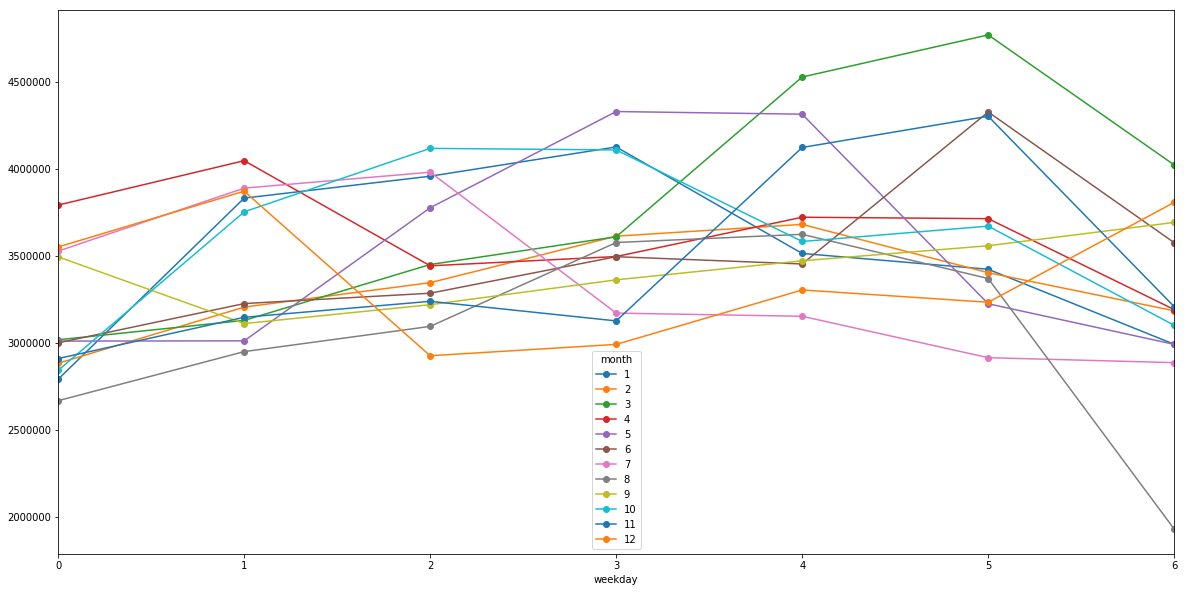

In [8]:
meses_weekday.unstack(level=0).plot(style="-o", figsize=(20,10))

In [0]:
dft=leer_archivo_limpio('trip_data_1.csv.gz',compute=True)
dft['pickup_datetime'] = dd.to_datetime(dft['pickup_datetime'])
dft['month']=dft['pickup_datetime'].dt.month
dft['hour'] = dft['pickup_datetime'].dt.hour
meses_hour=dft.groupby(['month','hour'])['passenger_count'].sum()
files =[plantilla.format(month) for month in range(2,13)]
for file in files:  
  df=leer_archivo_limpio(file, compute=True)
  df['pickup_datetime'] = dd.to_datetime(df['pickup_datetime'])
  df['month']=df['pickup_datetime'].dt.month
  df['hour'] = df['pickup_datetime'].dt.hour
  meses_hour=meses_hour.append(df.groupby(['month','hour'])['passenger_count'].sum())

In [10]:
meses_hour

month  hour
1      0        895100
       1        679078
       2        520733
       3        387305
       4        279507
       5        240178
       6        517432
       7        925386
       8       1155783
       9       1155361
       10      1061759
       11      1080305
       12      1196923
       13      1216841
       14      1296395
       15      1267477
       16      1102752
       17      1290717
       18      1576680
       19      1556779
       20      1408464
       21      1369150
       22      1338258
       23      1112946
2      0        878306
       1        618542
       2        454427
       3        340863
       4        245472
       5        218878
                ...   
11     18      1425820
       19      1520942
       20      1427484
       21      1392603
       22      1347628
       23      1188811
12     0       1015501
       1        756677
       2        557008
       3        402964
       4        294689
       5        237870

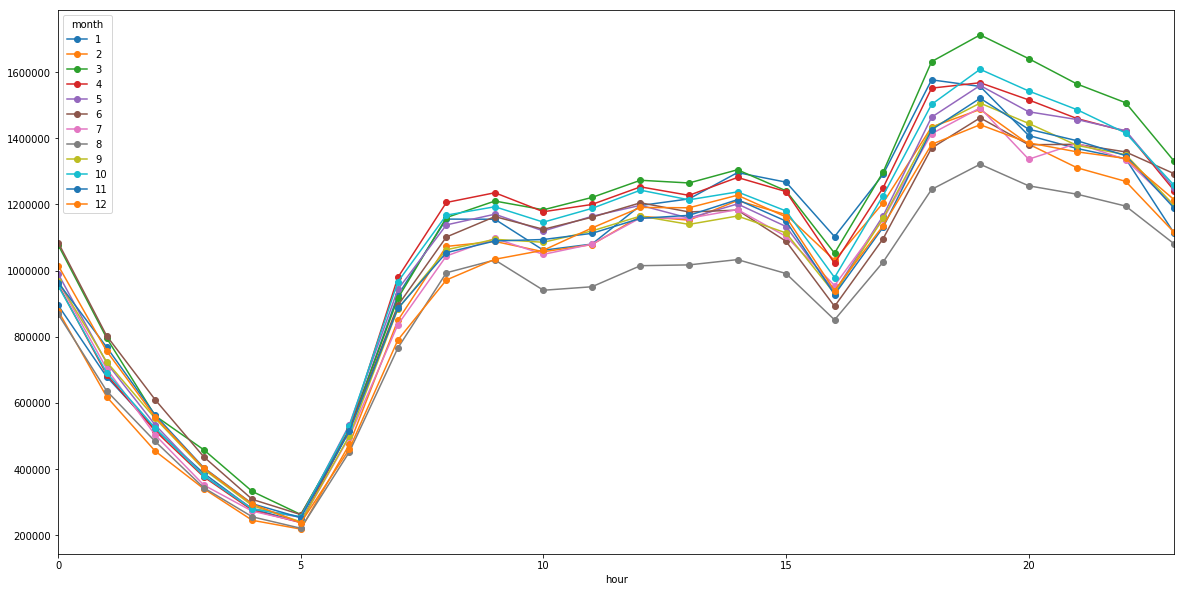

In [11]:
meses_hour.unstack(level=0).plot(style="-o", figsize=(20,10))

##10. Elegir el vehiculo con mas viajes. <br/> 
En cada mes y graficar en un mapa los sitios donde se suben pasajeros agrupados por dia de la semana (un color distinto para cada dia)
hora del dia (un color distinto para cada intervalo de cuatro horas,00:00 - 03:59, 04:00--07:59, 08:00-11:59, etc.)

##11. Repetir para las posiciones donde se bajan los pasajeros para el mismo vehiculo.